In [1]:
import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as mp
import sys
import os
%load_ext autoreload
%autoreload 2

In [2]:
# Go up one level to the project root
sys.path.append(os.path.abspath(".."))

from src.preprocessing import run_preprocessing,load_raw_data

# testing preprocessing pipeline

- src/preprocessing contains fns to be called
- load_raw_data("csv_name") returns data as df_raw
- run_preprocessing("csv_name") runs the entire pipeline and,
   1.  saves a csv named as processed_data.csv in data/processed folder
   2. returns df_preprocessed 

In [4]:
df_raw=load_raw_data("station_day.csv")
df_raw

,StationId,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,AP001,2017-11-24,71.36,115.75,1.75,20.65,12.40,12.19,0.10,10.76,109.26,0.17,5.92,0.10,NaN,NaN
1,AP001,2017-11-25,81.40,124.50,1.44,20.50,12.08,10.72,0.12,15.24,127.09,0.20,6.50,0.06,184.0,Moderate
2,AP001,2017-11-26,78.32,129.06,1.26,26.00,14.85,10.28,0.14,26.96,117.44,0.22,7.95,0.08,197.0,Moderate
3,AP001,2017-11-27,88.76,135.32,6.60,30.85,21.77,12.91,0.11,33.59,111.81,0.29,7.63,0.12,198.0,Moderate
4,AP001,2017-11-28,64.18,104.09,2.56,28.07,17.01,11.42,0.09,19.00,138.18,0.17,5.02,0.07,188.0,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108030,WB013,2020-06-27,8.65,16.46,NaN,NaN,NaN,NaN,0.69,4.36,30.59,1.32,7.26,NaN,50.0,Good
108031,WB013,2020-06-28,11.80,18.47,NaN,NaN,NaN,NaN,0.68,3.49,38.95,1.42,7.92,NaN,65.0,Satisfactory
108032,WB013,2020-06-29,18.60,32.26,13.65,200.87,214.20,11.40,0.78,5.12,38.17,3.52,8.64,NaN,63.0,Satisfactory
108033,WB013,2020-06-30,16.07,39.30,7.56,29.13,36.69,29.26,0.69,5.88,29.64,1.86,8.40,NaN,57.0,Satisfactory


In [5]:
df_preprocessed=run_preprocessing("station_day.csv")
df_preprocessed

d:\SPARSH\pollution data\urban-air-quality-index-predictor\src\preprocessing.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Date"] = pd.to_datetime(df["Date"], errors='coerce')


,Date,PM2.5,PM10,NO2,AQI
5898,2018-11-12,0.315210,0.412717,0.656742,404.0
5899,2018-11-13,0.379255,0.508513,0.955293,406.0
5900,2018-11-14,0.193720,0.248258,0.809795,372.0
5901,2018-11-15,0.132574,0.175273,0.644032,280.0
5902,2018-11-16,0.187950,0.244816,0.490890,319.0
...,...,...,...,...,...
6491,2020-06-27,0.040000,0.217929,0.128789,117.0
6492,2020-06-28,0.056646,0.414121,0.077949,234.0
6493,2020-06-29,0.053430,0.284433,0.024976,290.0
6494,2020-06-30,0.053306,0.122402,0.028620,129.0


In [6]:
df_raw.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,86410.000000,65329.000000,90929.000000,91488.000000,92535.000000,59930.000000,95037.000000,82831.000000,82467.000000,76580.000000,69333.000000,22898.000000,87025.000000
mean,80.272571,157.968427,23.123424,35.240760,41.195055,28.732875,1.605749,12.257634,38.134836,3.358029,15.345394,2.423446,179.749290
std,76.526403,123.418672,34.491019,29.510827,45.145976,24.897797,4.369578,12.984723,39.128004,11.156234,29.348587,6.472409,131.324339
min,0.020000,0.010000,0.010000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,8.000000
25%,31.880000,70.150000,4.840000,15.090000,13.970000,11.900000,0.530000,5.040000,18.895000,0.160000,0.690000,0.000000,86.000000
50%,55.950000,122.090000,10.290000,27.210000,26.660000,23.590000,0.910000,8.950000,30.840000,1.210000,4.330000,0.400000,132.000000
75%,99.920000,208.670000,24.980000,46.930000,50.500000,38.137500,1.450000,14.920000,47.140000,3.610000,17.510000,2.110000,254.000000
max,1000.000000,1000.000000,470.000000,448.050000,467.630000,418.900000,175.810000,195.650000,963.000000,455.030000,454.850000,170.370000,2049.000000


In [7]:
df_preprocessed.describe()


,Date,PM2.5,PM10,NO2,AQI
count,577,577.000000,577.000000,577.000000,577.000000
mean,2019-09-07 05:24:26.204506112,0.129186,0.223467,0.393844,213.431542
min,2018-11-12 00:00:00,0.000000,0.000000,0.000000,36.000000
25%,2019-04-06 00:00:00,0.052340,0.114945,0.236423,112.000000
50%,2019-09-07 00:00:00,0.094051,0.200671,0.365123,190.000000
75%,2020-02-06 00:00:00,0.179600,0.313785,0.525198,313.000000
max,2020-07-01 00:00:00,0.523037,0.644377,1.000000,484.000000
std,NaN,0.104729,0.137188,0.215526,116.194742


# testing training ESN pipeline


In [3]:
from src.train_esn import train_esn_pollutant
from src.config import POLLUTANTS

Training ESNs for PM2.5 (index 0) 
Training ESNs for PM10 (index 1) 
Training ESNs for NO2 (index 2) 


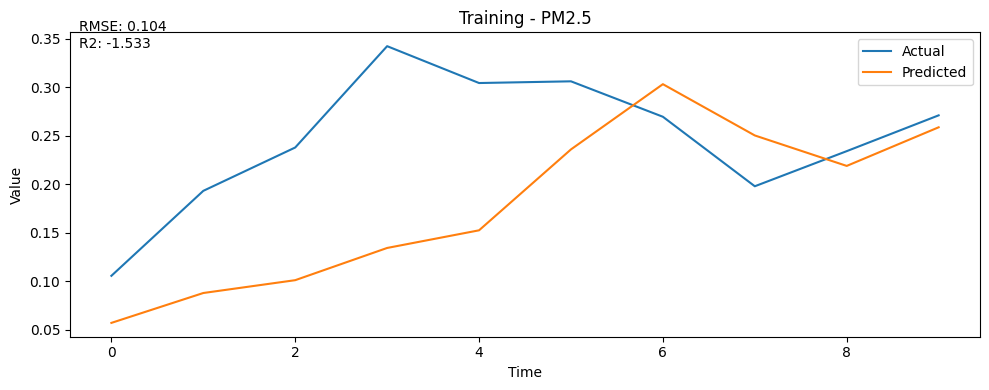

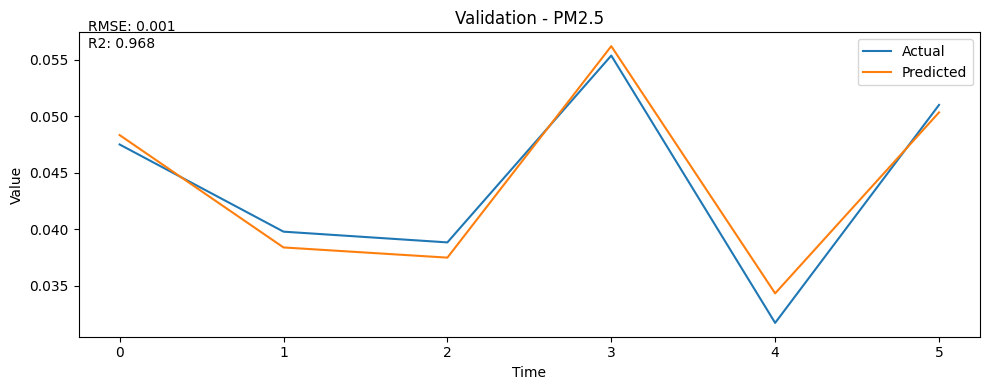

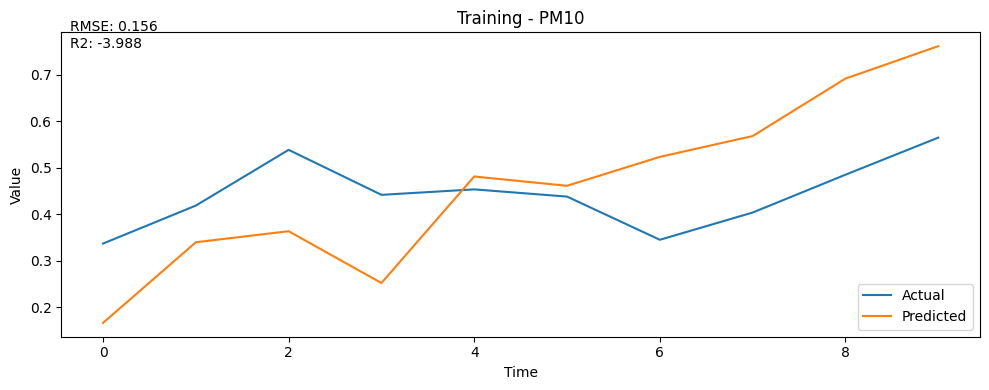

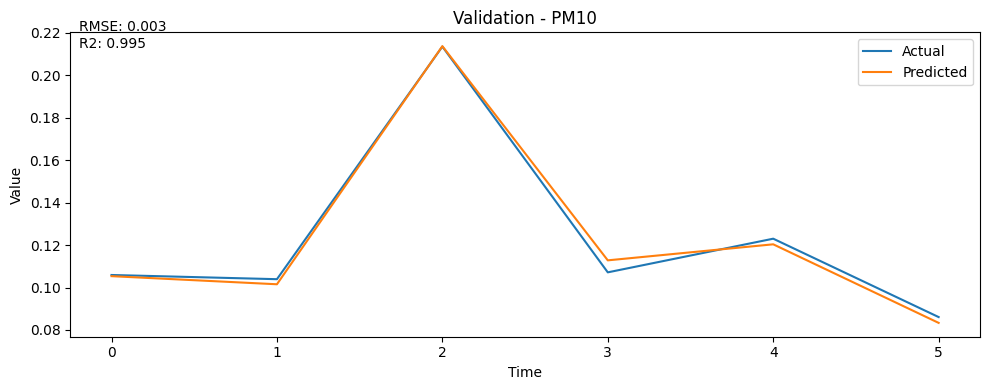

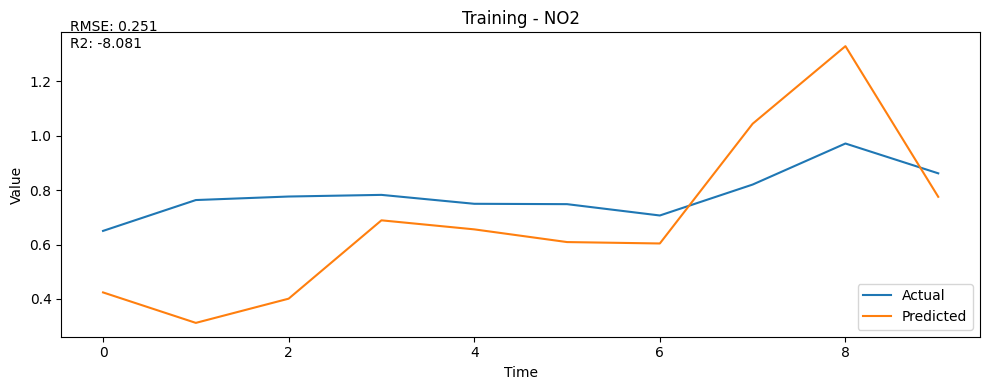

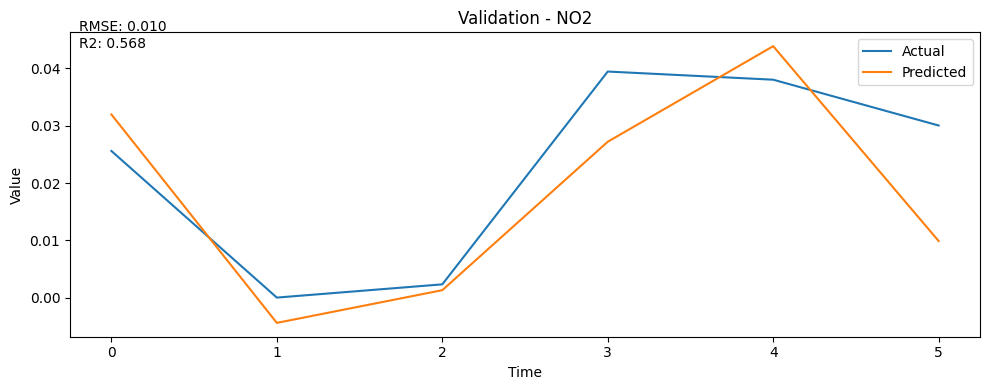

In [4]:
df_preprocessed=pd.read_csv("D:/SPARSH/pollution data/urban-air-quality-index-predictor/data/processed/processed_data.csv")
for pollutant in POLLUTANTS:
    train_esn_pollutant(df_preprocessed, pollutant)

should expect esn_<"pollutant">.pkl inside models folder after this ....

## hyperparams tuning 

In [5]:
from src.esn_hyperparams_tuning import run_hyperparams
run_hyperparams()

SyntaxError: invalid syntax. Perhaps you forgot a comma? (esn_hyperparams_tuning.py, line 45)

# Testing esn 

updated
Predicting for PM2.5...


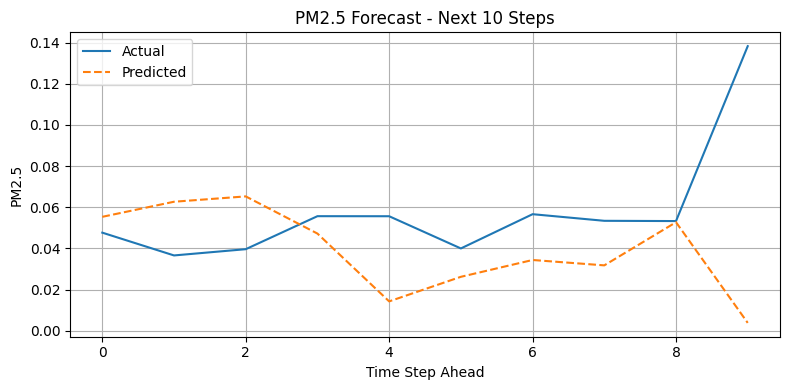

Predicting for PM10...


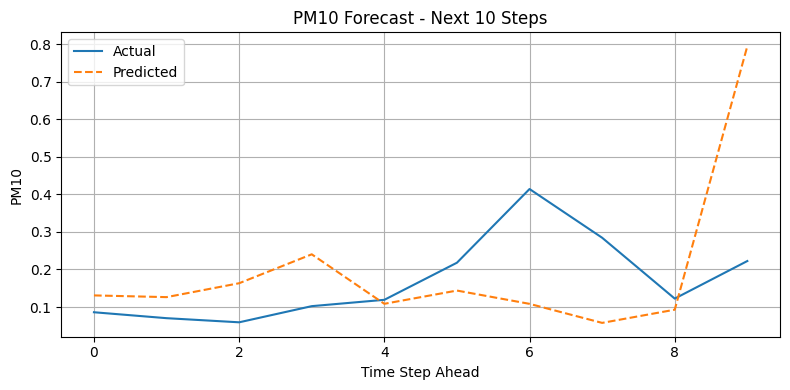

Predicting for NO2...


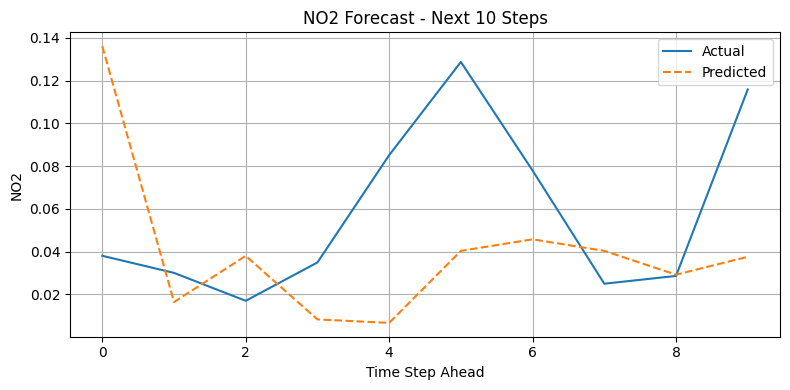

In [5]:
from src.test_esn import test_all_esns
test_all_esns()